In [1]:
def change_to_log(df,feature):
    sign = np.sign(df[feature])
    df[feature] = sign * np.log(np.abs(df[feature]) + 1)

import warnings
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings("ignore")

In [2]:
features = [
    'y',
    'report_id',
'work_province', 
'count_payment_state_C_lnd', 
'agent', 
'ind_query_reason_1', 
'edu_level_under', 
'ind_query_reason_sum', 
'salary', 
'credit_limit_amount', 
'actual_payment_amount_lnd', 
'credit_limit_amount_lnd',
'not_clear_latest_6m_used_avg_amount', 
'not_clear_credit_limit', 
'is_local', 
'count_sum_ovd_months', 
'curr_overdue_amount_lnd', 
'count_other_loan_ln',
'count_payment_state_C_ln',
'actual_payment_amount', 
'count_payment_state_B_lnd', 
'remain_payment_cyc_days', 
'edu_level_middle', 
'share_credit_limit_amount_lnd', 
'count_payment_state_A_lnd', 
'scheduled_payment_amount_lnd', 
'count_loancard',
'curr_overdue_amount', 
'count_payment_state_A_ln', 
'ind_query_reason_0', 
'count_debit_card_ovd_months',
'not_logout_credit_limit', 
'not_logout_min_credit_limit_per_org', 
'ind_query_reason_2', 
'ind_normal_counts_lnd', 
'count_month', 
'count_loan_ovd_months',
'not_logout_used_credit_limit', 
'latest6_month_used_avg_amount_lnd', 
'scheduled_payment_amount', 
'not_logout_max_credit_limit_per_org', 
'flt_highest_loan_oa_per_mon', 
'not_clear_balance', 
'ind_loan_max_duration', 
'used_credit_limit_amount_lnd', 
'not_logout_finance_corp_count', 
'used_highest_amount_lnd', 
'all_max_duration', 
'count_credit_loan_lnd', 
'not_logout_latest_6m_used_avg_amount', 
'ind_org_counts', 
'count_sum_ovd_dw', 
'all_highest_oa_per_mon', 
'flt_sum_amount', 
'count_credit_loan_ln', 
'ind_debit_card_max_duration', 
'count_payment_state_D_ln', 
'edu_level_junior', 
'not_logout_finance_org_count', 
'lnd_ovd_sum_last_months', 
'balance', 
'count_operating_loan_ln', 
'range_lnd_ovd', 
'count_payment_state_D_lnd', 
'ave_ovd_amount', 
'count_other_loan', 
'not_logout_pre_credit_limit', 
'edu_level_bachelor', 
'not_clear_finance_org_count', 
'not_logout_pre_used_credit_limit', 
'cat_query_reason_la', 
'curr_overdue_cyc_days', 
'ind_clear_counts', 
'lnd_ovd_sum_amount', 
'not_logout_pre_min_credit_limit_per_org', 
'count_loan_ovd_dw', 
'not_logout_pre_finance_corp_count', 
'count_consumption loan_ln', 
'count_unknown_ln', 
'not_clear_finance_corp_count', 
'marry_status_married', 
'not_logout_account_count', 
'flt_highest_debit_card_oa_per_mon', 
'cat_query_reason_sqe', 
'count_payment_state_B_ln', 
'not_logout_pre_latest_6m_used_avg_amount', 
'has_fund', 
'count_spl', 
'count_pledge_guarantee_ln', 
'count_ovd', 
'not_logout_pre_max_credit_limit_per_org', 
'ind_normal_counts', 
'ind_clear_counts_lnd', 
'count_ensure_ln', 
'flt_highest_sixty_oa_per_mon', 
'not_logout_pre_finance_org_count', 
'not_logout_pre_account_count', 
'count_debit_card_ovd_dw',
'count_standard_loancard', 
'marry_status_divorced', 
'edu_level_other', 
'count_farmer_loan_ln', 
'ind_other_counts', 
'count_sharedebt', 
'count_normal_ln',
'count_combination_ln',
'marry_status_unmarried',
'cat_query_reason_mal',
'not_clear_account_count',
'ind_curr_overdue_cyc_lnd',
'ind_unact_counts_lnd',
'count_attention_ln',
'count_pledge_guarantee_bail_ln',
'count_payment_state_E_ln',
'count_other_guarantee_ln',
'count_payment_state_E_lnd',
'count_car_loan_ln', 
'count_house_loan_ln', 
'count_house_loan', 
'count_commercial_loan', 
'count_study_loan_ln', 
'count_housing_accumulation_ln', 
'count_commercial_housing_ln', 
'count_combination_ensure_ln', 
'count_farmer_joint_ln', 
'ind_other_counts_lnd', 
'count_combination_lnd', 
'count_pledge_guarantee_lnd', 
'count_ensure_lnd', 
'count_other_guarantee_lnd', 
'count_combination_ensure_lnd', 
'count_farmer_joint_lnd', 
'count_pledge_guarantee_bail_lnd', 
'count_sixty_ovd_dw', 
'count_sixty_ovd_months', 
'ind_sixty_max_duration', 
'marry_status_other', 
]

In [3]:
base_path = 'D:/DataSet/Credit/'
train = pd.read_csv(base_path + 'featured/train_all_feature_log.csv')
test = pd.read_csv(base_path + 'featured/test_all_feature_log.csv')

In [4]:
not_to_log = [
    'y',
    'report_id',
    'work_province',
    'salary',    
]
for col in train.columns:
    if len(np.unique(train[col])) == 2:
        not_to_log.append(col)
        
to_log = []
for col in train.columns:
    if col not in not_to_log:
        to_log.append(col)


for col in to_log:
    change_to_log(train,col)
    change_to_log(test, col)

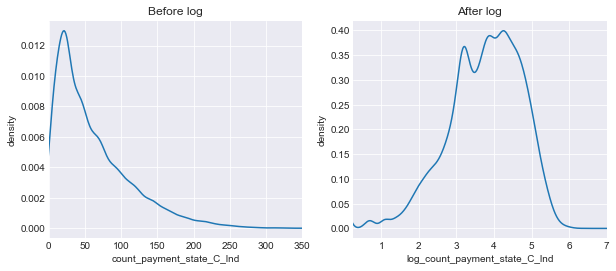

In [3]:
base_path = 'D:/DataSet/Credit/'
train = pd.read_csv(base_path + 'featured/train_all_feature.csv')
test = pd.read_csv(base_path + 'featured/test_all_feature.csv')

fig = plt.figure()
fig.set(alpha=0.2)
fig.set_size_inches(10, 4)

plt.subplot2grid((1,2), (0,0))
train.count_payment_state_C_lnd.plot(kind='kde')
plt.title(u'Before log')
plt.xlabel(u'count_payment_state_C_lnd')
plt.ylabel(u'density')
plt.xlim(0, 350)


not_to_log = [
    'y',
    'report_id',
    'work_province',
    'salary',    
]
for col in train.columns:
    if len(np.unique(train[col])) == 2:
        not_to_log.append(col)
        
to_log = []
for col in train.columns:
    if col not in not_to_log:
        to_log.append(col)


for col in to_log:
    change_to_log(train,col)
    change_to_log(test, col)
    
plt.subplot2grid((1,2), (0,1))
train.count_payment_state_C_lnd.plot(kind='kde')
plt.title(u'After log')
plt.xlabel(u'log_count_payment_state_C_lnd')
plt.ylabel(u'density')
plt.xlim(0.25, 7)

plt.show()

In [4]:
test.to_csv(base_path+'featured/test_all_feature_log.csv', index=False, encoding='utf8')
train.to_csv(base_path+'featured/train_all_feature_log.csv', index=False, encoding='utf8')

In [5]:
################################
######  变量按重要性排序  ######
################################

base_path = 'D:/DataSet/Credit/'
train = pd.read_csv(base_path + 'featured/train_all_feature_log.csv')
test = pd.read_csv(base_path + 'featured/test_all_feature_log.csv')

train = train[features]
features.remove('y')
test = test[features]

test.to_csv(base_path+'featured/test_bayes.csv', index=False, encoding='utf8')
train.to_csv(base_path+'featured/train_bayes.csv', index=False, encoding='utf8')